# Symulator parametrów obwodowych obwodu ze sprzężeniem indukcyjnym

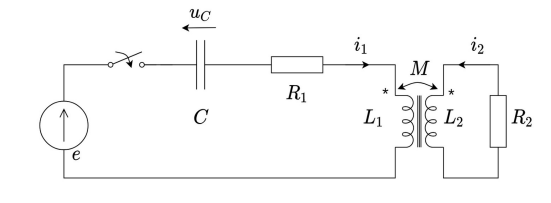

Wartość początkowa zmiennych stanu: <br />
* i1 = 0 [A]<br />
* i2 = 0 [A]<br />
* uc = 0 [V]<br />

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Część 1.

0 < t < 30 s

In [22]:
#Definicja zmiennych
h = 0.08
t1 = 30
t = np.arange(0,t1,h)
y = np.array([[0],[0],[0]])
e1 = [120 if x%3<1.5 else 0 for x in np.arange(0,30,h)]
e2 = np.sin(t)
e3 = 210*np.sin(2*np.pi*5*t)
e4 = 120*np.sin(2*np.pi*50*t)

In [3]:
#podstawiamy i1=y1, i2=y2, uc=y3

def dy(y,index,e):
    R1 = 0.09
    R2 = 10
    C = 0.5
    L1 = 3
    L2 = 5
    M = 0.8
    D1 = L1/M - M/L2
    D2 = M/L1 - L2/M
    
    matrix1 = np.matmul(np.array([[-R1/(M*D1), R2/(L2*D1), -1/(M*D1)],[-R1/(L1*D2), R2/(M*D2), -1/(L1*D2)],[1/C, 0, 0]]),y)
    matrix1 = np.swapaxes([matrix1],0,1)
    matrix2 = np.array([[1/(M*D1)],[1/(L1*D2)],[0]])*e[index]
    
    return matrix1+matrix2

In [4]:
#metoda eulera
def euler(a,h,e):
    y = np.array([[0],[0],[0]])
    Xi = a+t*h
    for index in range(len(t)-1):
        y = np.append(y,(np.swapaxes([y[:,index]],0,1)+ h*dy(y[:,index],index,e)),axis=1)
    return y

#ulepszona metoda eulera
def improved_euler(a,h,e):
    y = np.array([[0],[0],[0]])
    Xi = a+t*h
    for index in range(len(t)-1):
        y = np.append(y,(np.swapaxes([y[:,index]],0,1) + h*dy(y[:,index] + (h/2)*(y[:,index]),index,e)),axis=1)
    return y

In [5]:
#funkcje rysujące wykresy
def current_euler(e):
    a=euler(0,h,e)
    b =a[0,:]
    c = a[1,:]
    plt.plot(t,b,t,c)
    plt.title('Metoda eulera')
    plt.xlabel('t(s)')
    plt.ylabel('I(A)', rotation='horizontal')
    plt.legend(['i1','i2'])
    plt.show()

def current_improved_euler(e):
    a=improved_euler(0,h,e)
    b =a[0,:]
    c = a[1,:]
    plt.plot(t,b,t,c)
    plt.title('Ulepszona metoda eulera')
    plt.xlabel('t(s)')
    plt.ylabel('I(A)', rotation='horizontal')
    plt.legend(['i1','i2'])
    plt.show()
    
def voltage_euler(e):
    a =euler(0,h,e)[2,:]
    plt.plot(t,e,t,a)
    plt.title('Metoda Eulera')
    plt.xlabel('t(s)')
    plt.ylabel('U(V)', rotation='horizontal')
    plt.legend(['e','uc'])
    plt.show()

def voltage_improved_euler(e):
    a =improved_euler(0,h,e)[2,:]
    plt.plot(t,e,t,a)
    plt.title('Ulepszona metoda Eulera')
    plt.xlabel('t(s)')
    plt.ylabel('U(V)', rotation='horizontal')
    plt.legend(['e','uc'])
    plt.show()

## Wykresy przebiegów

e = 120 dla t < T/2 <br />
e = 0 dla t >= T/2<br />
T=3[s]

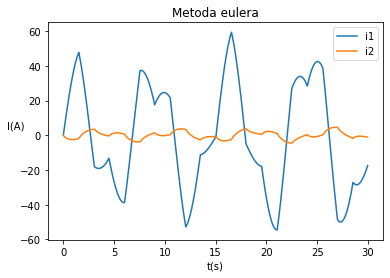

In [6]:
current_euler(e1)

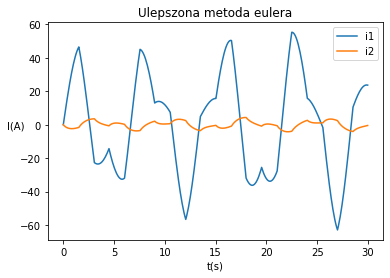

In [7]:
current_improved_euler(e1)

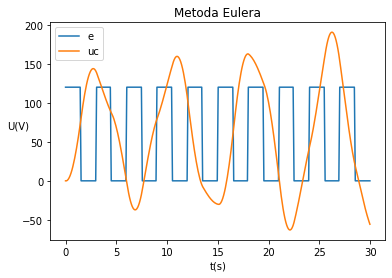

In [8]:
voltage_euler(e1)

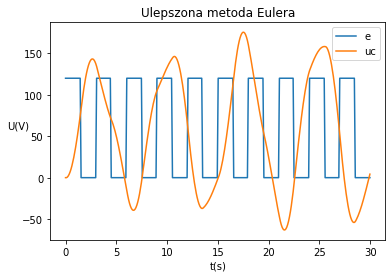

In [9]:
voltage_improved_euler(e1)

### e(t) = 240sin(t)

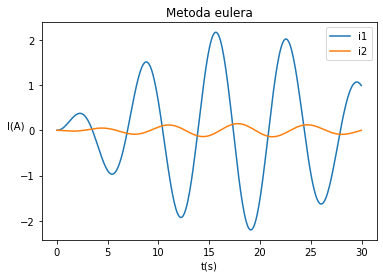

In [10]:
current_euler(e2)

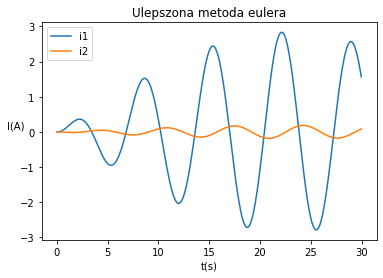

In [11]:
current_improved_euler(e2)

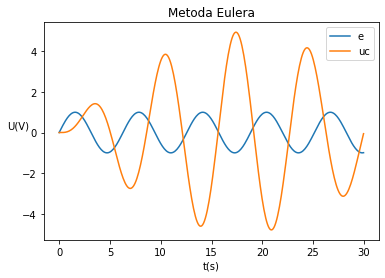

In [12]:
voltage_euler(e2)

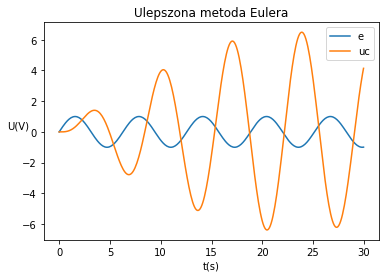

In [13]:
voltage_improved_euler(e2)

### e(t) = 210sin(2πft), dla f = 5 Hz

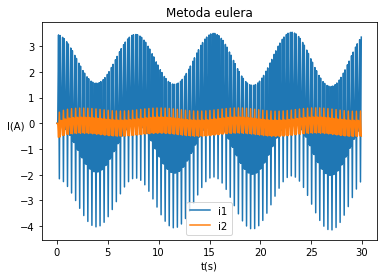

In [23]:
current_euler(e3)

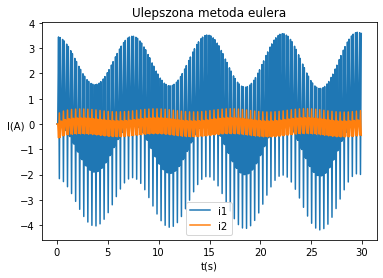

In [24]:
current_improved_euler(e3)

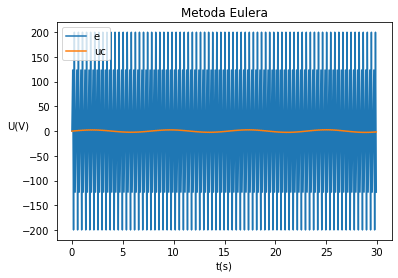

In [25]:
voltage_euler(e3)

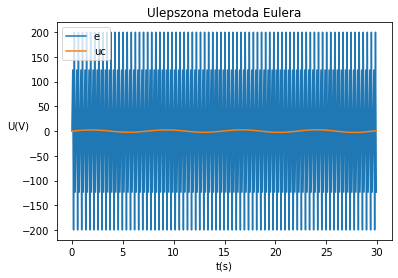

In [26]:
voltage_improved_euler(e3)

### e(t) = 120sin(2πft), dla f = 50 Hz

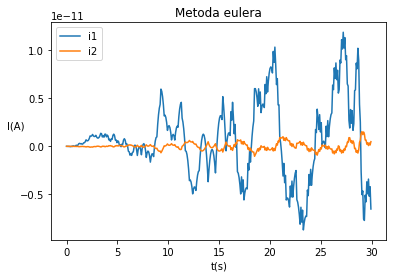

In [27]:
current_euler(e4)

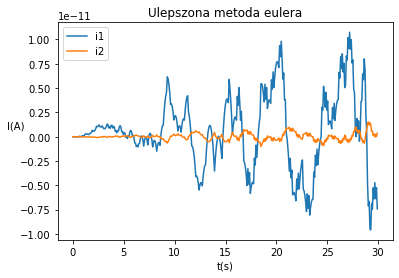

In [28]:
current_improved_euler(e4)

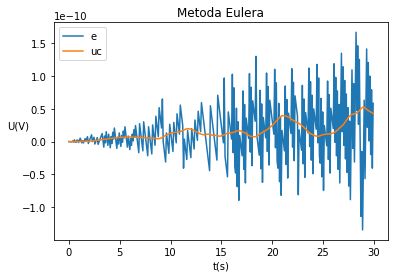

In [29]:
voltage_euler(e4)

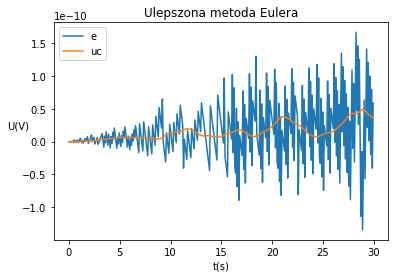

In [30]:
voltage_improved_euler(e4)